In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [198]:
sns.set(rc={"figure.figsize":(10, 6)})

# Exploratory Data Analysis and Visualization

In [199]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/NLP/Classification/Nepali Movie Review Classificaion/nepalimoviereviews.csv")

In [200]:
data.sample(10)

,Reviews,Emotion
498,फिलिमले एकदमै मन छोयो र नेपाली चलचित्र उद्योगक...,1.0
477,कति सुपथ मुल्यमा बनेको चलचित्र होला पुरै सारा ...,1.0
440,हाहा हाहा एस्तो फिलिम त कहिले पनि हेर्नू नपरोस...,0.0
33,अहो कस्तो राम्रो अभिनय कस्तो हृदय बिदार्क कथा ...,1.0
155,यस्तै जाबो फील्म त के हेर्नु है!!,0.0
57,अत्यन्तै उतकृस्ट लाग्यो र रहेछ चलचित्र,1.0
10,राम्रो छ फिल्म। यत्तीको फिल्म नेपालमा आउनु नै ...,1.0
417,धेरै राम्रो फिल्म बनेकोरहेछ जनचेतनाको लागी धे...,1.0
173,यति राम्रो फिलिम त सायद एक जुनि मा एक चोटि मात...,1.0
9,यो फिल्मले मन छोयो एकदमै राम्रो छ,1.0


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reviews  602 non-null    object 
 1   Emotion  602 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.6+ KB


In [202]:
print(f"There are {data.Emotion.nunique()} types of emotion." )

There are 2 types of emotion.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


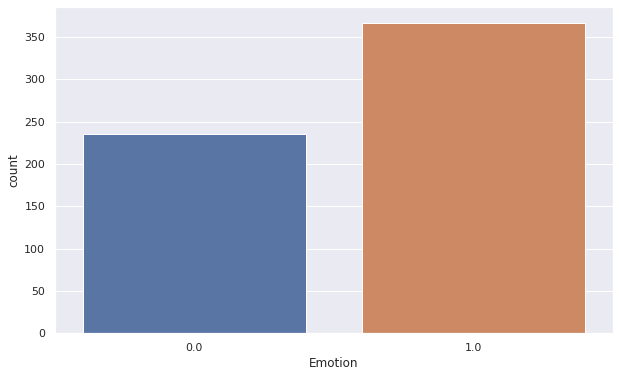

In [203]:
sns.countplot(data.Emotion)

In [204]:
data.Emotion.value_counts()

1.0    367
0.0    235
Name: Emotion, dtype: int64

# Text Preprocessing

*   Tokenize the words
*   Remove stopwords
*   stemming or lemmatization



In [205]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [206]:
print(stopwords.words('nepali'))

['छ', 'र', 'पनि', 'छन्', 'लागि', 'भएको', 'गरेको', 'भने', 'गर्न', 'गर्ने', 'हो', 'तथा', 'यो', 'रहेको', 'उनले', 'थियो', 'हुने', 'गरेका', 'थिए', 'गर्दै', 'तर', 'नै', 'को', 'मा', 'हुन्', 'भन्ने', 'हुन', 'गरी', 'त', 'हुन्छ', 'अब', 'के', 'रहेका', 'गरेर', 'छैन', 'दिए', 'भए', 'यस', 'ले', 'गर्नु', 'औं', 'सो', 'त्यो', 'कि', 'जुन', 'यी', 'का', 'गरि', 'ती', 'न', 'छु', 'छौं', 'लाई', 'नि', 'उप', 'अक्सर', 'आदि', 'कसरी', 'क्रमशः', 'चाले', 'अगाडी', 'अझै', 'अनुसार', 'अन्तर्गत', 'अन्य', 'अन्यत्र', 'अन्यथा', 'अरु', 'अरुलाई', 'अर्को', 'अर्थात', 'अर्थात्', 'अलग', 'आए', 'आजको', 'ओठ', 'आत्म', 'आफू', 'आफूलाई', 'आफ्नै', 'आफ्नो', 'आयो', 'उदाहरण', 'उनको', 'उहालाई', 'एउटै', 'एक', 'एकदम', 'कतै', 'कम से कम', 'कसै', 'कसैले', 'कहाँबाट', 'कहिलेकाहीं', 'का', 'किन', 'किनभने', 'कुनै', 'कुरा', 'कृपया', 'केही', 'कोही', 'गए', 'गरौं', 'गर्छ', 'गर्छु', 'गर्नुपर्छ', 'गयौ', 'गैर', 'चार', 'चाहनुहुन्छ', 'चाहन्छु', 'चाहिए', 'छू', 'जताततै', 'जब', 'जबकि', 'जसको', 'जसबाट', 'जसमा', 'जसलाई', 'जसले', 'जस्तै', 'जस्तो', 'जस्तोसुकै', 'जहाँ'

In [207]:
!!pip install git+https://github.com/sushil79g/Nepali_nlp.git

['Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/',
 'Collecting git+https://github.com/sushil79g/Nepali_nlp.git',
 '  Cloning https://github.com/sushil79g/Nepali_nlp.git to /tmp/pip-req-build-ehduxgbd',
 '  Running command git clone -q https://github.com/sushil79g/Nepali_nlp.git /tmp/pip-req-build-ehduxgbd',
 'Requirement already satisfied: gensim==3.7.3 in /usr/local/lib/python3.7/dist-packages (from Nepali-nlp==0.0.0) (3.7.3)',
 'Requirement already satisfied: requests==2.22.0 in /usr/local/lib/python3.7/dist-packages (from Nepali-nlp==0.0.0) (2.22.0)',
 'Requirement already satisfied: wget==3.2 in /usr/local/lib/python3.7/dist-packages (from Nepali-nlp==0.0.0) (3.2)',
 'Requirement already satisfied: beautifulsoup4 in /usr/local/lib/python3.7/dist-packages (from Nepali-nlp==0.0.0) (4.6.3)',
 'Requirement already satisfied: news-please in /usr/local/lib/python3.7/dist-packages (from Nepali-nlp==0.0.0) (1.5.22)',
 'Requirement alread

In [208]:
from Nepali_nlp import Stem
text = "सरकारका प्रवक्ता प्रदीप ज्ञवालीले पनि गत बिहीबार उनलाई अनशन तोड्न आग्रह गरेका थिए"
Stem().rootify(text)

['सरकार',
 'प्रवक्ता',
 'प्रदीप',
 'ज्ञवाली',
 'पनि',
 'गत',
 'बिहीबार',
 'उन',
 'अनशन',
 'तोड्न',
 'आग्रह',
 'गर',
 '']

In [209]:
text = ["आग्रह", "गरेका", "थिए"]
Stem().rootify(text)

['आग्रह', 'गर', '']

In [210]:
!pip install nepalitokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [211]:
from nepalitokenizer import NepaliTokenizer

In [212]:
tokenize = NepaliTokenizer()
print(tokenize.tokenizer('के छ खबर तिम्रो ? '))

['खबर', 'तिम्रो']


In [213]:
def text_preprocessing(text):
  # Tokenize the reviews
  text = tokenize.tokenizer(text)
  # Remove the nepali stopwords
  text = [word for word in text if word not in stopwords.words('nepali')]
  # Stemming the nepali words
  text = Stem().rootify(text)
  text = ' '.join(text)
  # Remove the leading and trailing spaces
  text = text.split()
  text = ' '.join(text)
  
  return text

In [214]:
data.columns

Index(['Reviews', 'Emotion'], dtype='object')

In [215]:
data.Reviews[0]

'म एक शिक्षक , शिक्षा क्षेत्रमा रमाएको मान्छे । सामुदायिक विद्यालयमा अध्यापन गराउछु। मलाइ यो चलचित्रले मन नै छोयो । वास्तविक घटना यहि हो कि नेपालका तमाम सामुदायिक विद्यालय यहि समस्या बाट गुज्रीत छन । यस्तै शिक्षा सम्बन्धीको चलचित्र बनोस भनेर अपेक्षा गरेको थिए, आसा पूरा भयो । धन्यवाद सबै लाइ'

In [216]:
text_preprocessing(data.Reviews[0])

'शिक्षक शिक्षा क्षेत्र रमा मान् सामुदायिक विद्यालय अध्यापन गराउ म चलचित्र मन छो वास्तविक घटना यहि नेपाल तमाम सामुदायिक विद्यालय यहि समस्या गुज्रीत शिक्षा सम्बन्धी चलचित्र बनोस अपेक्षा आसा पूरा धन्यवाद'

In [217]:
data.dropna(inplace = True)

In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602 entries, 0 to 601
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Reviews  602 non-null    object 
 1   Emotion  602 non-null    float64
dtypes: float64(1), object(1)
memory usage: 14.1+ KB


In [219]:
data.isna().sum()

Reviews    0
Emotion    0
dtype: int64

# Text Vectorization

In [220]:
X = data["Reviews"].apply(text_preprocessing)
y = data["Emotion"]

In [221]:
X[0]

'शिक्षक शिक्षा क्षेत्र रमा मान् सामुदायिक विद्यालय अध्यापन गराउ म चलचित्र मन छो वास्तविक घटना यहि नेपाल तमाम सामुदायिक विद्यालय यहि समस्या गुज्रीत शिक्षा सम्बन्धी चलचित्र बनोस अपेक्षा आसा पूरा धन्यवाद'

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

In [223]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 10000, ngram_range = (1, 2))

In [224]:
tfidf_vectorizer = tfidf.fit(X_train)

In [225]:
print(len(tfidf_vectorizer.vocabulary_))

607


In [226]:
X_train = tfidf_vectorizer.transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)

# Classifier

In [227]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [228]:
pred = nb_classifier.predict(X_test)

In [ ]:
score = metrics.accuracy_score(y_test, pred)
print(f"Accuracy Score : {score}")

Accuracy Score : 0.6058091286307054


In [ ]:
cm = metrics.confusion_matrix(y_test, pred)
cm

array([[  6, 188],
       [  2, 286]])

# Text Classification using LSTM layer

In [ ]:
from collections import Counter
def count_words(text):
  """
  Count unique words
  """
  count = Counter()
  for sentence in text:
    for word in sentence.split():
      count[word] += 1
  return count


In [ ]:
X[1]

'सरकारी स्कूल कलेज पढेर करीब बर्ष बिभिन्न बोडिङ्ग स्कूल पढा शिक्षक सरकारी स्कूल हु फिल्म सन्देशमुलक सबै हेर्नुहोला'

In [ ]:
type(X)

pandas.core.series.Series

In [ ]:
X[100]

'फिल्म सारै मन पराे फिल्म हेरन पाईयाेस्'

In [ ]:
counter = count_words(X)

In [ ]:
counter

Counter({'शिक्षक': 2,
         'शिक्षा': 7,
         'क्षेत्र': 3,
         'रमा': 1,
         'मान्': 13,
         'सामुदायिक': 3,
         'विद्यालय': 3,
         'अध्यापन': 1,
         'गराउ': 1,
         'म': 8,
         'चलचित्र': 78,
         'मन': 92,
         'छो': 19,
         'वास्तविक': 9,
         'घटना': 4,
         'यहि': 6,
         'नेपाल': 20,
         'तमाम': 1,
         'समस्या': 4,
         'गुज्रीत': 1,
         'सम्बन्धी': 3,
         'बनोस': 1,
         'अपेक्षा': 2,
         'आसा': 1,
         'पूरा': 6,
         'धन्यवाद': 11,
         'सरकारी': 4,
         'स्कूल': 3,
         'कलेज': 1,
         'पढेर': 3,
         'करीब': 1,
         'बर्ष': 1,
         'बिभिन्न': 1,
         'बोडिङ्ग': 1,
         'पढा': 1,
         'हु': 13,
         'फिल्म': 353,
         'सन्देशमुलक': 4,
         'सबै': 4,
         'हेर्नुहोला': 1,
         'शिव': 1,
         'मन्दिर': 1,
         'देख्न': 2,
         'पा': 18,
         'ठाउ': 2,
         'सम्पुर्ण': 4,
         'टिम': 1

In [ ]:
print(f"There are {len(counter)} unique words in the corpus")

There are 1976 unique words in the corpus


In [ ]:
num_words = len(counter)
# max number of words in a sequence
max_length = 12

In [229]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 101)

In [230]:
type(X_train)

pandas.core.series.Series

In [231]:
X_train.iloc[0]

'नेपाली फिल्म हेर् परिवर्तन थाल् नेपाली फिल्म'

In [232]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = num_words)
tokenizer.fit_on_texts(X_train)

In [233]:
word_index = tokenizer.word_index
word_index

{'फिल्म': 1,
 'नेपाली': 2,
 'फिलिम': 3,
 'मन': 4,
 'चलचित्र': 5,
 'कथा': 6,
 'लाग्': 7,
 'हेर्': 8,
 'बनाउ': 9,
 'हेर्न': 10,
 'हेर': 11,
 'ब': 12,
 'बना': 13,
 'कलाकार': 14,
 'अभिनय': 15,
 'यार': 16,
 'हिरो': 17,
 'मुभी': 18,
 'रै': 19,
 'झुर': 20,
 'छो': 21,
 'हेरेर': 22,
 'नेपाल': 23,
 'गर': 24,
 'अति': 25,
 'सारै': 26,
 'पा': 27,
 'एकद': 28,
 'छि': 29,
 'माया': 30,
 'फ्लिम': 31,
 'नया': 32,
 'उत्कृष्ट': 33,
 'टिम': 34,
 'हेरे': 35,
 'नाम': 36,
 'हु': 37,
 'एस्तो': 38,
 'बस्तु': 39,
 'बनाउन': 40,
 'आधारित': 41,
 'समाज': 42,
 'है': 43,
 'लागेन': 44,
 'जति': 45,
 'यथार्थ': 46,
 'मुबि': 47,
 'बधाई': 48,
 'चाहिँ': 49,
 'छ्या': 50,
 'पर': 51,
 'भन्': 52,
 'रमाइलो': 53,
 'भय': 54,
 'शुभकामना': 55,
 'नेपालि': 56,
 'वास्तविक': 57,
 'राम्रै': 58,
 'कहानी': 59,
 'सन्देश': 60,
 'धन्यवाद': 61,
 'सम्पूर्ण': 62,
 'मज्जा': 63,
 'दामि': 64,
 'पैसा': 65,
 'दामी': 66,
 'बन्': 67,
 'हल': 68,
 'भ': 69,
 'पात्र': 70,
 'परेन': 71,
 'मुभि': 72,
 'लास्ट': 73,
 'क': 74,
 'इतिहास': 75,
 'आ': 76,
 'हजुर': 77,

In [234]:
train_sequences = tokenizer.texts_to_sequences(X_train)

In [235]:
train_sequences[0]

[2, 1, 8, 271, 272, 2, 1]

In [236]:
from keras_preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences, maxlen = max_length, padding = 'post', truncating = 'post')

In [237]:
train_padded[0]

array([  2,   1,   8, 271, 272,   2,   1,   0,   0,   0,   0,   0],
      dtype=int32)

In [243]:
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen = max_length, padding = "post", truncating = "post")

In [244]:
print(X_train.iloc[0])
print(train_sequences[0])

नेपाली फिल्म हेर् परिवर्तन थाल् नेपाली फिल्म
[2, 1, 8, 271, 272, 2, 1]


In [245]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [246]:
def decode(text):
  return " ".join([reverse_word_index.get(i, "?") for i in  text])

In [247]:
decode(train_sequences[0])

'नेपाली फिल्म हेर् परिवर्तन थाल् नेपाली फिल्म'

In [248]:
print(f"Spape of train {train_padded.shape}")
print(f"Spape of test {test_padded.shape}")

Spape of train (481, 12)
Spape of test (121, 12)


In [249]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

model = Sequential([
    Embedding(num_words, 64, input_length = max_length),
    LSTM(64, dropout = 0.1),
    Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 12, 64)            126464    
                                                                 
 lstm_2 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 159,553
Trainable params: 159,553
Non-trainable params: 0
_________________________________________________________________
None


In [250]:
len(train_padded)

481

In [251]:
len(y_train)

481

In [252]:
history = model.fit(train_padded, y_train, epochs = 30, batch_size = 64, validation_data = (test_padded, y_test))

Epoch 1/30
8/8 [==============================] - 4s 161ms/step - loss: 0.6871 - accuracy: 0.5904 - val_loss: 0.6721 - val_accuracy: 0.6364
Epoch 2/30
8/8 [==============================] - 0s 18ms/step - loss: 0.6699 - accuracy: 0.6029 - val_loss: 0.6547 - val_accuracy: 0.6364
Epoch 3/30
8/8 [==============================] - 0s 19ms/step - loss: 0.6505 - accuracy: 0.6029 - val_loss: 0.6536 - val_accuracy: 0.6364
Epoch 4/30
8/8 [==============================] - 0s 18ms/step - loss: 0.5893 - accuracy: 0.6258 - val_loss: 0.5905 - val_accuracy: 0.6694
Epoch 5/30
8/8 [==============================] - 0s 18ms/step - loss: 0.3790 - accuracy: 0.8378 - val_loss: 0.4251 - val_accuracy: 0.8347
Epoch 6/30
8/8 [==============================] - 0s 19ms/step - loss: 0.1586 - accuracy: 0.9626 - val_loss: 0.5664 - val_accuracy: 0.8430
Epoch 7/30
8/8 [==============================] - 0s 21ms/step - loss: 0.0815 - accuracy: 0.9792 - val_loss: 0.6474 - val_accuracy: 0.8512
Epoch 8/30
8/8 [==========

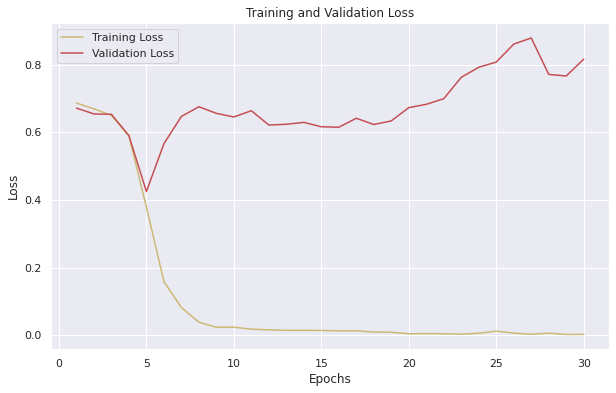

In [253]:
#plot the training and validation accuracy and losss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label = "Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

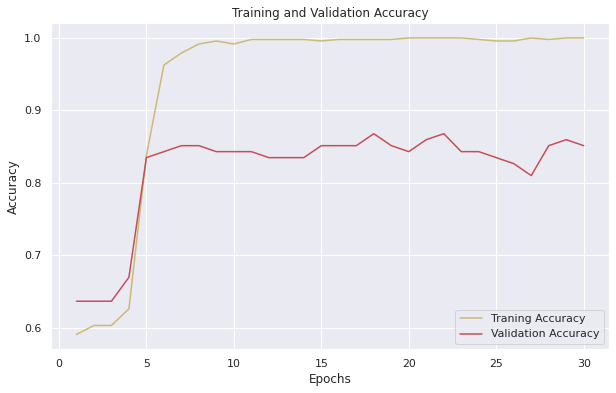

In [254]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label = "Traning Accuracy")
plt.plot(epochs, val_acc, 'r', label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

4/4 [==============================] - 0s 9ms/step


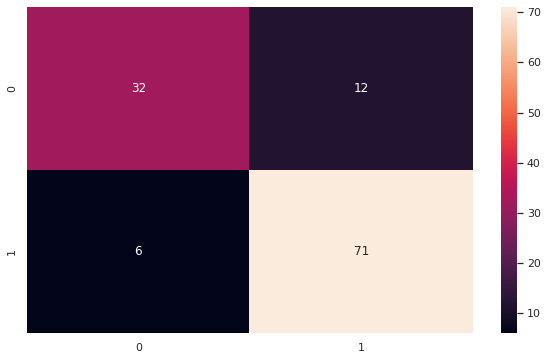

In [256]:
from sklearn.metrics import confusion_matrix

# Predicting the test set results
y_pred = model.predict(test_padded)
y_pred = (y_pred > 0.5)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot = True)

In [257]:
model.save("/content/drive/MyDrive/Colab Notebooks/NLP/Classification/Nepali Movie Review Classificaion/reviewV1.h5")